In [130]:
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("nfl_pbp.csv")

In [131]:
df = df[['game_date', 'posteam','yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','play_type','score_differential','shotgun','no_huddle']]

df = df.dropna()

In [132]:
train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'BAL') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'BAL') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

In [133]:
train_df

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
2460,2010-09-13,BAL,80.0,757.0,1657.0,3457.0,1,1.0,0.0,10,pass,0.0,0,0
2466,2010-09-13,BAL,70.0,649.0,1549.0,3349.0,1,1.0,0.0,10,run,-3.0,0,0
2467,2010-09-13,BAL,70.0,612.0,1512.0,3312.0,1,2.0,0.0,10,run,-3.0,0,0
2468,2010-09-13,BAL,69.0,581.0,1481.0,3281.0,1,3.0,0.0,9,pass,-3.0,1,0
2469,2010-09-13,BAL,55.0,552.0,1452.0,3252.0,1,1.0,0.0,10,pass,-3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407531,2018-12-30,BAL,9.0,527.0,527.0,527.0,4,2.0,1.0,9,run,6.0,1,0
407534,2018-12-30,BAL,12.0,490.0,490.0,490.0,4,3.0,1.0,12,run,6.0,1,0
407549,2018-12-30,BAL,75.0,204.0,204.0,204.0,4,1.0,0.0,10,run,2.0,1,0
407550,2018-12-30,BAL,72.0,166.0,166.0,166.0,4,2.0,0.0,7,run,2.0,1,0


In [134]:
test_df

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
409154,2019-09-08,BAL,89.0,896.0,1796.0,3596.0,1,1.0,0.0,10,run,0.0,1,0
409155,2019-09-08,BAL,40.0,849.0,1749.0,3549.0,1,1.0,0.0,10,pass,0.0,1,0
409156,2019-09-08,BAL,33.0,813.0,1713.0,3513.0,1,2.0,0.0,3,run,0.0,1,0
409157,2019-09-08,BAL,22.0,770.0,1670.0,3470.0,1,1.0,0.0,10,pass,0.0,1,0
409158,2019-09-08,BAL,19.0,747.0,1647.0,3447.0,1,2.0,0.0,7,run,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453079,2019-12-29,BAL,59.0,205.0,205.0,205.0,4,3.0,0.0,8,run,18.0,1,0
453080,2019-12-29,BAL,49.0,161.0,161.0,161.0,4,1.0,0.0,10,run,18.0,1,0
453082,2019-12-29,BAL,47.0,120.0,120.0,120.0,4,2.0,0.0,8,run,18.0,1,0
453083,2019-12-29,BAL,45.0,77.0,77.0,77.0,4,3.0,0.0,6,run,18.0,0,0


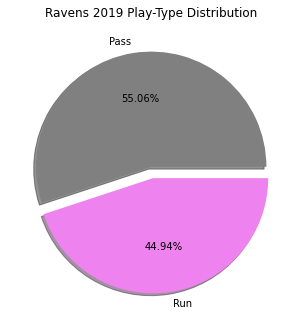

In [135]:
relative_frequency = test_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['grey', 'violet']
plt.pie(relative_frequency, labels = ('Pass', 'Run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)
plt.title("Ravens 2019 Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [136]:
train_features = train_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
train_label = train_df['play_type']

test_features = test_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
test_label = test_df['play_type']

In [137]:
gradientboostingregressor = ensemble.GradientBoostingClassifier(n_estimators = 75, learning_rate = 0.04 )

gradientboostingregressor.fit(train_features, train_label)

GradientBoostingClassifier(learning_rate=0.04, n_estimators=75)

In [138]:
prediction = gradientboostingregressor.predict(test_features)

accuracy = accuracy_score(test_label, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 49.47%


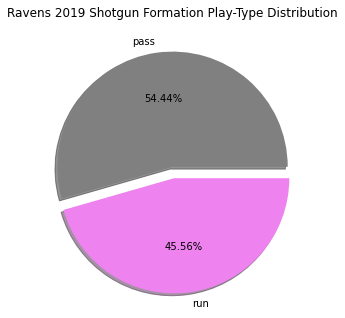

In [139]:
shotgun_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'BAL') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]

relative_frequency = shotgun_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['grey', 'violet']
plt.pie(relative_frequency, labels = ('pass', 'run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)

plt.title("Ravens 2019 Shotgun Formation Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()